<a href="https://colab.research.google.com/github/fish34/sberbank_data_analysis/blob/master/HW%205/hw5_geo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/fish34/sberbank_data_analysis.git

Cloning into 'sberbank_data_analysis'...
remote: Enumerating objects: 203, done.
remote: Counting objects: 100% (106/106), done.
remote: Compressing objects: 100% (77/77), done.
remote: Total 203 (delta 45), reused 63 (delta 27), pack-reused 97
Receiving objects: 100% (203/203), 55.09 MiB | 26.62 MiB/s, done.
Resolving deltas: 100% (62/62), done.


In [2]:
!pip install geopandas

     |████████████████████████████████| 1.0MB 6.2MB/s 
     |████████████████████████████████| 6.5MB 14.8MB/s 
     |████████████████████████████████| 15.3MB 324kB/s 


In [97]:
from shapely.geometry import Point
from shapely.ops import nearest_points
import numpy as np
from astropy import constants,units

### Упражнение 1
* Реализуйте функцию `get_geodesic_distance`, рассчитывающее геодезическое расстояние между двумя точками в километрах.

# Сигнатура функции и пример вывода:
# Формула гаверсина - https://ru.qaz.wiki/wiki/Haversine_formula
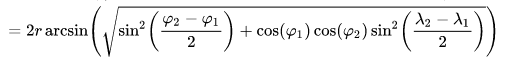

In [91]:



mipt = Point(55.9297243, 37.5199434) 
kremlin = Point(55.752023, 37.6174994)

def get_geodesic_distance(point1, point2):  
# широта точки 1 и широта точки 2 (в радианах)
# долгота точки 1 и долгота точки 2 (в радианах).
    fi1= np.radians(point1.x)
    fi2=np.radians(point2.x)
    lmd1=np.radians(point1.y)
    lmd2=np.radians(point2.y)
    delta_fi=(fi2-fi1)/2
    delta_lmd=(lmd2-lmd1)/2
    d=2*constants.R_earth.to(units.km)*np.arcsin(np.sqrt((np.sin(delta_fi))**2+np.cos(fi1)*np.cos(fi2)*(np.sin(delta_lmd))**2))
    return d

get_geodesic_distance(mipt, kremlin)


<Quantity 20.6999949 km>

### Упражнение 2

* Реализуйте функцию `get_k_nearest_neighbours_by_dist`, осуществляющую поиск `k` ближайших соседей полигона из заданного списка на основе геодезического расстояния. Добавьте две возможности учета расстояния: через ближайшие точки на границах полигонов и через центроиды полигонов.

In [5]:
import geopandas as gpd
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [189]:
def nearest(geom1,geom2):
    pts=nearest_points(geom1,geom2)
    return get_geodesic_distance(pts[0],pts[1]).value

def get_k_nearest_neighbours_by_dist(polygon, polygons, k=10, kind='by_board'):
  poly_gs=gpd.GeoSeries(polygon)
  polys_gs=gpd.GeoDataFrame(geometry=polygons)
  if kind == 'by_centroid':
    centroid=poly_gs.centroid
    polys_gs['distance']=polys_gs.geometry.apply(lambda x: get_geodesic_distance(centroid,x.centroid))
  if kind == 'by_board':
     polys_gs['distance']=polys_gs.geometry.apply(lambda x: nearest(polygon,x))
  
  polys_gs.sort_values('distance',inplace=True,ignore_index=True)
  return polys_gs[['distance','geometry']][:k]

get_k_nearest_neighbours_by_dist(polygon, polygons, k=10, kind='by_board')


distance                                           geometry
0   0.000000  POLYGON ((37.36254 55.45441, 37.36222 55.45238...
1   3.631090  POLYGON ((37.56548 55.48742, 37.56537 55.48674...
2   4.816937  POLYGON ((37.59183 55.51249, 37.59802 55.51471...
3   6.145617  POLYGON ((37.10850 55.43951, 37.11139 55.43980...
4  10.825829  POLYGON ((37.45684 55.64032, 37.45685 55.64017...
5  13.846089  POLYGON ((37.20236 55.23965, 37.19984 55.23772...
6  13.865760  MULTIPOLYGON (((37.31548 55.61297, 37.31545 55...
7  15.505379  POLYGON ((37.36977 55.65952, 37.37095 55.65906...
8  15.901343  POLYGON ((37.48916 55.61072, 37.48888 55.61008...
9  16.204671  POLYGON ((37.60229 55.56637, 37.60358 55.56459...

In [190]:
# Сигнатура функции и пример вывода:

big_moscow_districts = gpd.read_file('/content/sberbank_data_analysis/data/big_moscow_disticts/big_moscow_districts.shp')
polygon = random.sample(big_moscow_districts['geometry'].tolist(), 1)[0]
polygons = random.sample(big_moscow_districts['geometry'].tolist(), 50)

In [191]:
k_nearest_neighbours_by_board = get_k_nearest_neighbours_by_dist(polygon, polygons, k=10, kind='by_board')
k_nearest_neighbours_by_centroid = get_k_nearest_neighbours_by_dist(polygon, polygons, k=10, kind='by_centroid')
k_nearest_neighbours_by_board

distance                                           geometry
0   0.000000  POLYGON ((37.43917 55.47948, 37.43900 55.47936...
1   0.000000  POLYGON ((37.32750 55.49526, 37.32621 55.49344...
2   5.204711  POLYGON ((37.10850 55.43951, 37.11139 55.43980...
3   7.085460  POLYGON ((37.42782 55.31473, 37.42234 55.31236...
4   7.143379  POLYGON ((37.55447 55.56026, 37.55420 55.55930...
5  11.101367  POLYGON ((37.34203 55.66013, 37.34224 55.66023...
6  16.514566  POLYGON ((37.48916 55.61072, 37.48888 55.61008...
7  16.528317  POLYGON ((36.80357 55.45162, 36.80451 55.46551...
8  16.723813  POLYGON ((37.58930 55.55720, 37.58821 55.55369...
9  18.114601  POLYGON ((37.41748 55.68078, 37.41732 55.68089...

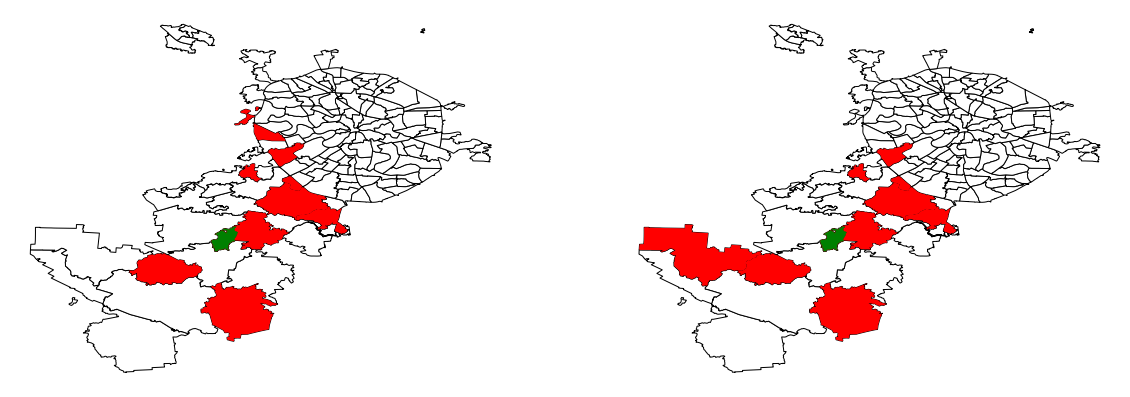

In [192]:
###

fig = plt.figure(figsize=(20, 10))

ax = plt.subplot(1, 2, 1)
big_moscow_districts.plot(ax=ax, color='white', edgecolor='black')
k_nearest_neighbours_by_centroid.plot(ax=ax, color='red')
gpd.GeoSeries(polygon).plot(ax=ax, color='green')
ax.set_axis_off()

ax = plt.subplot(1, 2, 2)
big_moscow_districts.plot(ax=ax, color='white', edgecolor='black')
k_nearest_neighbours_by_board.plot(ax=ax, color='red')
gpd.GeoSeries(polygon).plot(ax=ax, color='green')
ax.set_axis_off()

### Упражнение 4
* Отобразите результаты упражнений 2 и 3 (рисунки с `###`) на интерактивной карте в `Folium`

In [193]:
import folium

m = folium.Map(location=[55.755826, 37.6172999], # Москва
               zoom_start=10)
m.choropleth(big_moscow_districts, fill_color='white')
knnc=gpd.GeoDataFrame(k_nearest_neighbours_by_centroid,crs='EPSG:4326')
m.choropleth(knnc, fill_color='red')
m.choropleth(polygon, fill_color='green')
folium.Marker([polygon.centroid.y,polygon.centroid.x], 
              tooltip='Центр',
              icon=folium.Icon(color='green', icon='star')).add_to(m)

m

/usr/local/lib/python3.7/dist-packages/folium/folium.py:426: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [194]:
m = folium.Map(location=[55.755826, 37.6172999], # Москва
               zoom_start=10)
m.choropleth(big_moscow_districts, fill_color='white')
knnb=gpd.GeoDataFrame(k_nearest_neighbours_by_board,crs='EPSG:4326')
m.choropleth(knnb, fill_color='red')
m.choropleth(polygon, fill_color='green')
folium.Marker([polygon.centroid.y,polygon.centroid.x], 
              tooltip='Центр',
              icon=folium.Icon(color='green', icon='star')).add_to(m)


m

/usr/local/lib/python3.7/dist-packages/folium/folium.py:426: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning
